### Sales data from major Chinese e-Commerce platform

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv ('./dataset.csv', encoding = 'ISO-8859-1')
df

C:\Users\jhjia\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


RowID          OrderID   OrderDate  ShipDate        ShipMode  \
0          1    IN-2011-47883    2011/1/1  2011/1/8  Standard Class   
1          2    IN-2011-47883    2011/1/1  2011/1/8  Standard Class   
2          3    IN-2011-47883    2011/1/1  2011/1/8  Standard Class   
3          4  IT-2011-3647632    2011/1/1  2011/1/5    Second Class   
4          5     HU-2011-1220    2011/1/1  2011/1/5    Second Class   
...      ...              ...         ...       ...             ...   
51096  51094    IN-2014-75603  2014/12/31  2015/1/5    Second Class   
51097  51095     TU-2014-5170  2014/12/31  2015/1/4    Second Class   
51098  51096     MO-2014-2560  2014/12/31  2015/1/5  Standard Class   
51099  51097  ES-2014-4785777  2014/12/31  2015/1/4  Standard Class   
51100  51098   CA-2014-143259  2014/12/31  2015/1/4  Standard Class   

      CustomerID       CustomerName      Segment           City  \
0       JH-15985        Joseph Holt     Consumer    Wagga Wagga   
1       JH-15985        Joseph Holt     Consumer    Wagga Wagga   
2       JH-15985        Joseph Holt     Consumer    Wagga Wagga   
3       EM-14140       Eugene Moren  Home Office      Stockholm   
4         AT-735      Annie Thurman     Consumer       Budapest   
...          ...                ...          ...            ...   
51096   BS-11365       Bill Shonely    Corporate     Vijayawada   
51097   VD-11670  Valerie Dominguez     Consumer          Konya   
51098    LP-7095          Liz Preis     Consumer         Agadir   
51099   DP-13390      Dennis Pardue  Home Office        Hamburg   
51100   PO-18865  Patrick O'Donnell     Consumer  New York City   

                 State  ...         ProductID         Category Sub-Category  \
0      New South Wales  ...   OFF-SU-10000618  Office Supplies     Supplies   
1      New South Wales  ...   OFF-PA-10001968  Office Supplies        Paper   
2      New South Wales  ...   FUR-FU-10003447        Furniture  Furnishings   
3            Stockholm  ...   OFF-PA-10001492  Office Supplies        Paper   
4             Budapest  ...  OFF-TEN-10001585  Office Supplies      Storage   
...                ...  ...               ...              ...          ...   
51096   Andhra Pradesh  ...   OFF-FA-10000263  Office Supplies    Fasteners   
51097            Konya  ...  FUR-TEN-10000558        Furniture  Furnishings   
51098          Souss-M  ...  OFF-WIL-10001069  Office Supplies      Binders   
51099          Hamburg  ...   OFF-BI-10000620  Office Supplies      Binders   
51100         New York  ...   OFF-BI-10003684  Office Supplies      Binders   

                                   ProductName    Sales Quantity Discount  \
0                     Acme Trimmer, High Speed  120.366        3      0.1   
1      Eaton Computer Printout Paper, 8.5 x 11   55.242        2      0.1   
2                   Eldon Light Bulb, Duo Pack  113.670        5      0.1   
3                  Enermax Note Cards, Premium   44.865        3      0.5   
4                      Tenex Box, Single Width   66.120        4      0.0   
...                                        ...      ...      ...      ...   
51096         Stockwell Thumb Tacks, Bulk Pack   39.420        3      0.0   
51097                   Tenex Frame, Erganomic  173.760        4      0.6   
51098  Wilson Jones Hole Reinforcements, Clear    3.990        1      0.0   
51099          Wilson Jones Index Tab, Economy   32.250        5      0.0   
51100     Wilson Jones Legal Size Ring Binders   52.776        3      0.2   

        Profit  ShippingCost  OrderPriority  
0       36.036          9.72         Medium  
1       15.342          1.80         Medium  
2       37.770          4.70         Medium  
3      -26.055          4.82           High  
4       29.640          8.17           High  
...        ...           ...            ...  
51096   17.280          2.97         Medium  
51097 -117.360         13.72         Medium  
51098    0.420          0.49         Medium  
51099    8.250 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51101 entries, 0 to 51100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowID          51101 non-null  int64  
 1   OrderID        51101 non-null  object 
 2   OrderDate      51101 non-null  object 
 3   ShipDate       51101 non-null  object 
 4   ShipMode       51090 non-null  object 
 5   CustomerID     51101 non-null  object 
 6   CustomerName   51101 non-null  object 
 7   Segment        51101 non-null  object 
 8   City           51101 non-null  object 
 9   State          51101 non-null  object 
 10  Country        51101 non-null  object 
 11  PostalCode     9962 non-null   float64
 12  Market         51101 non-null  object 
 13  Region         51101 non-null  object 
 14  ProductID      51101 non-null  object 
 15  Category       51101 non-null  object 
 16  Sub-Category   51101 non-null  object 
 17  ProductName    51101 non-null  object 
 18  Sales 

#### Data cleansing - steps I have followed:
--> data that is against commonsense (e.g. delivery data is earlier than order date)

--> null/repeated/wrong values

# --------------------------------------------

### 1. Order date later than delivery date

In [7]:
df ['OrderDate'] = pd.to_datetime (df['OrderDate'])
df ['ShipDate'] = pd.to_datetime (df ['ShipDate'])
df ['interval'] = (df.ShipDate - df.OrderDate).dt.total_seconds()
df [df.interval<0]

Empty DataFrame
Columns: [RowID, OrderID, OrderDate, ShipDate, ShipMode, CustomerID, CustomerName, Segment, City, State, Country, PostalCode, Market, Region, ProductID, Category, Sub-Category, ProductName, Sales, Quantity, Discount, Profit, ShippingCost, OrderPriority, interval]
Index: []

[0 rows x 25 columns]

In [5]:
df.drop (index = df [df.interval<0].index, inplace=True)
df

RowID          OrderID  OrderDate   ShipDate        ShipMode  \
0          1    IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
1          2    IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
2          3    IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
3          4  IT-2011-3647632 2011-01-01 2011-01-05    Second Class   
4          5     HU-2011-1220 2011-01-01 2011-01-05    Second Class   
...      ...              ...        ...        ...             ...   
51096  51094    IN-2014-75603 2014-12-31 2015-01-05    Second Class   
51097  51095     TU-2014-5170 2014-12-31 2015-01-04    Second Class   
51098  51096     MO-2014-2560 2014-12-31 2015-01-05  Standard Class   
51099  51097  ES-2014-4785777 2014-12-31 2015-01-04  Standard Class   
51100  51098   CA-2014-143259 2014-12-31 2015-01-04  Standard Class   

      CustomerID       CustomerName      Segment           City  \
0       JH-15985        Joseph Holt     Consumer    Wagga Wagga   
1       JH-15985        Joseph Holt     Consumer    Wagga Wagga   
2       JH-15985        Joseph Holt     Consumer    Wagga Wagga   
3       EM-14140       Eugene Moren  Home Office      Stockholm   
4         AT-735      Annie Thurman     Consumer       Budapest   
...          ...                ...          ...            ...   
51096   BS-11365       Bill Shonely    Corporate     Vijayawada   
51097   VD-11670  Valerie Dominguez     Consumer          Konya   
51098    LP-7095          Liz Preis     Consumer         Agadir   
51099   DP-13390      Dennis Pardue  Home Office        Hamburg   
51100   PO-18865  Patrick O'Donnell     Consumer  New York City   

                 State  ...         Category  Sub-Category  \
0      New South Wales  ...  Office Supplies      Supplies   
1      New South Wales  ...  Office Supplies         Paper   
2      New South Wales  ...        Furniture   Furnishings   
3            Stockholm  ...  Office Supplies         Paper   
4             Budapest  ...  Office Supplies       Storage   
...                ...  ...              ...           ...   
51096   Andhra Pradesh  ...  Office Supplies     Fasteners   
51097            Konya  ...        Furniture   Furnishings   
51098          Souss-M  ...  Office Supplies       Binders   
51099          Hamburg  ...  Office Supplies       Binders   
51100         New York  ...  Office Supplies       Binders   

                                   ProductName    Sales Quantity Discount  \
0                     Acme Trimmer, High Speed  120.366        3      0.1   
1      Eaton Computer Printout Paper, 8.5 x 11   55.242        2      0.1   
2                   Eldon Light Bulb, Duo Pack  113.670        5      0.1   
3                  Enermax Note Cards, Premium   44.865        3      0.5   
4                      Tenex Box, Single Width   66.120        4      0.0   
...                                        ...      ...      ...      ...   
51096         Stockwell Thumb Tacks, Bulk Pack   39.420        3      0.0   
51097                   Tenex Frame, Erganomic  173.760        4      0.6   
51098  Wilson Jones Hole Reinforcements, Clear    3.990        1      0.0   
51099          Wilson Jones Index Tab, Economy   32.250        5      0.0   
51100     Wilson Jones Legal Size Ring Binders   52.776        3      0.2   

        Profit ShippingCost  OrderPriority  interval  
0       36.036         9.72         Medium  604800.0  
1       15.342         1.80         Medium  604800.0  
2       37.770         4.70         Medium  604800.0  
3      -26.055         4.82           High  345600.0  
4       29.640         8.17           High  345600.0  
...        ...          ...            ...       ...  
51096   17.280         2.97         Medium  432000.0  
51097 -117.360        13.72         Medium  345600.0  
51098    0.420         0.49         Medium  432000.0  
51099    8.250         2.21         Medium  345600.0  
51100   19.791         7.21           High  345600.0  

[51097 rows x 25 c

Any rows with sales price < 0?

In [6]:
df [df.Sales < 0]

Empty DataFrame
Columns: [RowID, OrderID, OrderDate, ShipDate, ShipMode, CustomerID, CustomerName, Segment, City, State, Country, PostalCode, Market, Region, ProductID, Category, Sub-Category, ProductName, Sales, Quantity, Discount, Profit, ShippingCost, OrderPriority, interval]
Index: []

[0 rows x 25 columns]

In [8]:
df.count()

RowID            51097
OrderID          51097
OrderDate        51097
ShipDate         51097
ShipMode         51086
CustomerID       51097
CustomerName     51097
Segment          51097
City             51097
State            51097
Country          51097
PostalCode        9962
Market           51097
Region           51097
ProductID        51097
Category         51097
Sub-Category     51097
ProductName      51097
Sales            51097
Quantity         51097
Discount         51097
Profit           51097
ShippingCost     51097
OrderPriority    51097
interval         51097
dtype: int64

In [9]:
df.isna()

RowID  OrderID  OrderDate  ShipDate  ShipMode  CustomerID  \
0      False    False      False     False     False       False   
1      False    False      False     False     False       False   
2      False    False      False     False     False       False   
3      False    False      False     False     False       False   
4      False    False      False     False     False       False   
...      ...      ...        ...       ...       ...         ...   
51096  False    False      False     False     False       False   
51097  False    False      False     False     False       False   
51098  False    False      False     False     False       False   
51099  False    False      False     False     False       False   
51100  False    False      False     False     False       False   

       CustomerName  Segment   City  State  ...  Category  Sub-Category  \
0             False    False  False  False  ...     False         False   
1             False    False  False  False  ...     False         False   
2             False    False  False  False  ...     False         False   
3             False    False  False  False  ...     False         False   
4             False    False  False  False  ...     False         False   
...             ...      ...    ...    ...  ...       ...           ...   
51096         False    False  False  False  ...     False         False   
51097         False    False  False  False  ...     False         False   
51098         False    False  False  False  ...     False         False   
51099         False    False  False  False  ...     False         False   
51100         False    False  False  False  ...     False         False   

       ProductName  Sales  Quantity  Discount  Profit  ShippingCost  \
0            False  False     False     False   False         False   
1            False  False     False     False   False         False   
2            False  False     False     False   False         False   
3            False  False     False     False   False         False   
4            False  False     False     False   False         False   
...            ...    ...       ...       ...     ...           ...   
51096        False  False     False     False   False         False   
51097        False  False     False     False   False         False   
51098        False  False     False     False   False         False   
51099        False  False     False     False   False         False   
51100        False  False     False     False   False         False   

       OrderPriority  interval  
0              False     False  
1              False     False  
2              False     False  
3              False     False  
4              False     False  
...              ...       ...  
51096          False     False  
51097          False     False  
51098          False     False  
51099          False     False  
51100          False     False  

[51097 rows x 25 columns]

In [12]:
df.isna().sum()

RowID                0
OrderID              0
OrderDate            0
ShipDate             0
ShipMode            11
CustomerID           0
CustomerName         0
Segment              0
City                 0
State                0
Country              0
PostalCode       41135
Market               0
Region               0
ProductID            0
Category             0
Sub-Category         0
ProductName          0
Sales                0
Quantity             0
Discount             0
Profit               0
ShippingCost         0
OrderPriority        0
interval             0
dtype: int64

In [14]:
df.describe()

RowID    PostalCode         Sales      Quantity      Discount  \
count  51097.000000   9962.000000  51097.000000  51097.000000  51097.000000   
mean   25549.751668  55225.189319    246.568189      3.476036      0.143456   
std    14750.670508  32062.973837    487.774029      2.279122      0.213386   
min        1.000000   1040.000000      0.444000      1.000000      0.000000   
25%    12775.000000  23223.000000     30.816000      2.000000      0.000000   
50%    25550.000000  57103.000000     85.140000      3.000000      0.000000   
75%    38324.000000  90008.000000    251.100000      5.000000      0.200000   
max    51098.000000  99301.000000  22638.480000     14.000000      1.500000   

             Profit  ShippingCost       interval  
count  51097.000000  51097.000000   51097.000000  
mean      28.515431     26.385308  342923.302738  
std      174.483766     57.286297  149417.616194  
min    -6599.978000      0.000000       0.000000  
25%        0.000000      2.610000  259200.000000  
50%        9.240000      7.800000  345600.000000  
75%       36.810000     24.450000  432000.000000  
max     8399.976000    933.570000  604800.000000

Note the maximum value of discount is 1.5. That is incorrect for sure. 
We will need to take care of that in our next steps.

In [19]:
#ROW-ID repeating

df.drop (index = df[df.RowID.duplicated()].index, inplace=True)
df.count()

RowID            51094
OrderID          51094
OrderDate        51094
ShipDate         51094
ShipMode         51083
CustomerID       51094
CustomerName     51094
Segment          51094
City             51094
State            51094
Country          51094
PostalCode        9962
Market           51094
Region           51094
ProductID        51094
Category         51094
Sub-Category     51094
ProductName      51094
Sales            51094
Quantity         51094
Discount         51094
Profit           51094
ShippingCost     51094
OrderPriority    51094
interval         51094
dtype: int64

In [20]:
df [df.ShipMode.isna()]

RowID          OrderID  OrderDate   ShipDate ShipMode CustomerID  \
13666  13665      BU-2012-460 2012-07-21 2012-07-25      NaN      AH-30   
13674  13673      BU-2012-460 2012-07-21 2012-07-25      NaN      AH-30   
18385  18384     AG-2012-6390 2012-11-26 2012-11-30      NaN    GH-4410   
33167  33165     MZ-2013-7330 2013-12-23 2013-12-25      NaN    CS-1950   
33619  33617     AE-2013-1530 2013-12-31 2014-01-03      NaN    MY-7380   
33622  33620     AE-2013-1530 2013-12-31 2014-01-03      NaN    MY-7380   
38164  38162   MX-2014-153269 2014-05-19 2014-05-22      NaN   MC-17275   
44243  44241     AJ-2014-6170 2014-09-16 2014-09-18      NaN    SH-9975   
44321  44319  ES-2014-4138124 2014-09-17 2014-09-22      NaN   BF-11275   
49931  49929   US-2014-134292 2014-12-14 2014-12-20      NaN   JK-15640   
50866  50864    IN-2014-64501 2014-12-29 2015-01-02      NaN   TB-21250   

          CustomerName      Segment            City            State  ...  \
13666    Aaron Hawkins    Corporate      Pazardzhik       Pazardzhik  ...   
13674    Aaron Hawkins    Corporate      Pazardzhik       Pazardzhik  ...   
18385      Gary Hansen  Home Office         Algiers            Alger  ...   
33167   Carlos Soltero     Consumer         Chimoio           Manica  ...   
33619  Maribeth Yedwab    Corporate  Ras al Khaymah  Ra's Al Khaymah  ...   
33622  Maribeth Yedwab    Corporate  Ras al Khaymah  Ra's Al Khaymah  ...   
38164       Marc Crier     Consumer         Rosario         Santa Fe  ...   
44243    Sally Hughsby    Corporate            Baku             Baki  ...   
44321    Beth Fritzler    Corporate            Oslo             Oslo  ...   
49931         Jim Kriz  Home Office     La Chorrera           Panama  ...   
50866     Tim Brockman     Consumer          Kanpur    Uttar Pradesh  ...   

              Category  Sub-Category                              ProductName  \
13666  Office Supplies     Envelopes  GlobeWeis Business Envelopes, Set of 50   
13674        Furniture        Chairs     Office Star Swivel Stool, Adjustable   
18385  Office Supplies         Paper         SanDisk Parchment Paper, Premium   
33167  Office Supplies      Supplies                   Elite Ruler, Easy Grip   
33619  Office Supplies      Supplies       Stiletto Letter Opener, High Speed   
33622  Office Supplies       Storage                      Tenex Folders, Blue   
38164  Office Supplies     Envelopes                  Kraft Mailers, Recycled   
44243  Office Supplies       Storage               Rogers Folders, Wire Frame   
44321       Technology        Phones              Nokia Audio Dock, Full Size   
49931  Office Supplies         Paper            Eaton Message Books, 8.5 x 11   
50866  Office Supplies    Appliances           Breville Coffee Grinder, Black   

         Sales Quantity Discount   Profit ShippingCost  OrderPriority  \
13666   17.340        1      0.0    4.680         1.29         Medium   
13674  176.430        1      0.0   17.640        12.70         Medium   
18385   16.710        1      0.0    3.150         1.10         Medium   
33167   15.420        1      0.0    1.050         1.03         Medium   
33619   16.668        2      0.7  -29.472         1.41           High   
33622    6.966        1      0.7   -8.604         1.75           High   
38164   43.740        3      0.4    7.260         7.50           High   
44243   29.760        1      0.0    3.270         4.28           High   
44321  840.150        5      0.0  142.800        23.19           High   
49931   29.664        3      0.4   -0.036         1.82         Medium   
50866  245.160        4      0.0   73.440        15.13         Medium   

       interval  
13666  345600.0  
13674  345600.0  
18385  345600.0  
33167  172800.0  
33619  259200.0  
33622  259200.0  
38164  259200.0  
44243  172800.0  
44321  432000.0  
49931  518400.0  
50866  345600.0  

[11 rows x 25 columns]

In [21]:
df['ShipMode'].fillna (df['ShipMode'].mode()[0], inplace = True)

In [22]:
df.count()

RowID            51094
OrderID          51094
OrderDate        51094
ShipDate         51094
ShipMode         51094
CustomerID       51094
CustomerName     51094
Segment          51094
City             51094
State            51094
Country          51094
PostalCode        9962
Market           51094
Region           51094
ProductID        51094
Category         51094
Sub-Category     51094
ProductName      51094
Sales            51094
Quantity         51094
Discount         51094
Profit           51094
ShippingCost     51094
OrderPriority    51094
interval         51094
dtype: int64

In [23]:
df [df.Discount>1]

RowID          OrderID  OrderDate   ShipDate        ShipMode  \
7441    7441     TU-2011-3230 2011-11-23 2011-11-27  Standard Class   
13913  13912    ID-2012-34884 2012-08-02 2012-08-08  Standard Class   
19195  19194   MX-2012-161704 2012-12-15 2012-12-20    Second Class   
22326  22325    ID-2013-34709 2013-04-15 2013-04-21  Standard Class   
22407  22406    IN-2013-25245 2013-04-17 2013-04-22  Standard Class   
22545  22544  IT-2013-3005581 2013-04-23 2013-04-30  Standard Class   
23328  23327  ES-2013-5311844 2013-05-18 2013-05-19     First Class   
23733  23732   CA-2013-152730 2013-05-31 2013-06-05  Standard Class   
27082  27081     MO-2013-5960 2013-08-20 2013-08-22    Second Class   
34025  34023   CA-2014-127306 2014-01-15 2014-01-19  Standard Class   
38856  38854   CA-2014-140872 2014-06-04 2014-06-11  Standard Class   
41634  41632    ID-2014-62289 2014-08-03 2014-08-07  Standard Class   
47274  47272   CA-2014-106691 2014-11-07 2014-11-13  Standard Class   

      CustomerID        CustomerName      Segment            City  \
7441     CS-1845          Cari Sayre    Corporate        Istanbul   
13913   SC-20305    Sean Christensen     Consumer        Adelaide   
19195   AH-10120         Adrian Hane  Home Office     Guadalajara   
22326   LC-16870       Lena Cacioppo     Consumer       Melbourne   
22407   JH-15985         Joseph Holt     Consumer          Manila   
22545   AJ-10780      Anthony Jacobs    Corporate       The Hague   
23328   JS-15880      John Stevenson     Consumer            Oslo   
23733   EM-14140        Eugene Moren  Home Office        Superior   
27082    JG-5115          Jack Garza     Consumer         Tangier   
34025   BH-11710     Brosina Hoffman     Consumer    Johnson City   
38856   NR-18550        Nick Radford     Consumer  Pembroke Pines   
41634   RB-19645      Robert Barroso    Corporate          Manila   
47274   CC-12370  Christopher Conant     Consumer         Houston   

                  State  ...         Category  Sub-Category  \
7441           Istanbul  ...        Furniture     Bookcases   
13913   South Australia  ...  Office Supplies       Binders   
19195           Jalisco  ...        Furniture     Bookcases   
22326          Victoria  ...  Office Supplies       Binders   
22407  National Capital  ...        Furniture        Chairs   
22545     South Holland  ...       Technology        Phones   
23328              Oslo  ...  Office Supplies       Binders   
23733         Wisconsin  ...  Office Supplies    Appliances   
27082    Tanger-Tétouan  ...  Office Supplies       Binders   
34025         Tennessee  ...  Office Supplies         Paper   
38856           Florida  ...  Office Supplies    Appliances   
41634  National Capital  ...       Technology       Copiers   
47274             Texas  ...  Office Supplies       Binders   

                                             ProductName     Sales Quantity  \
7441                  Safco 3-Shelf Cabinet, Traditional  270.1440        4   
13913                         Acco 3-Hole Punch, Economy   81.3240        3   
19195                 Safco 3-Shelf Cabinet, Traditional  180.0960        2   
22326                         Acco 3-Hole Punch, Durable  199.2060        7   
22407                             Hon Rocking Chair, Red  881.6850        9   
22545               Cisco Signal Booster, with Caller ID  227.7450        3   
23328                         Acco 3-Hole Punch, Economy  240.9600        8   
23733  Acco 7-Outlet Masterpiece Power Center, Wihtou...  364.7400        3   
27082                        Acco 3-Hole Punch, Recycled  182.8800        6   
34025                                         Xerox 1931   36.2880        7   
38856  Eureka Sanitaire  Multi-Pro Heavy-Duty Upright...   24.4720        7   
41634                      Hewlett Wireless Fax, Digital  740.6685        3   
47274                         Zipper Ring Binder Pockets    1.2480        2   

      Discount    Profit ShippingCost  OrderPriority  i

In [24]:
df [df.Discount < 0]

Empty DataFrame
Columns: [RowID, OrderID, OrderDate, ShipDate, ShipMode, CustomerID, CustomerName, Segment, City, State, Country, PostalCode, Market, Region, ProductID, Category, Sub-Category, ProductName, Sales, Quantity, Discount, Profit, ShippingCost, OrderPriority, interval]
Index: []

[0 rows x 25 columns]

In [28]:
df ['Discount'] = df['Discount'].mask (df['Discount']>1, None)
df [df.Discount.isna()]

meanDiscount = round (df[df.Discount.notnull()].Discount.sum() / df[df.Discount.notnull()].Discount.size, 2)
df['Discount'].fillna (value = meanDiscount, inplace = True)

In [29]:
df.drop (columns = ['PostalCode'], inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51094 entries, 0 to 51100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   RowID          51094 non-null  int64         
 1   OrderID        51094 non-null  object        
 2   OrderDate      51094 non-null  datetime64[ns]
 3   ShipDate       51094 non-null  datetime64[ns]
 4   ShipMode       51094 non-null  object        
 5   CustomerID     51094 non-null  object        
 6   CustomerName   51094 non-null  object        
 7   Segment        51094 non-null  object        
 8   City           51094 non-null  object        
 9   State          51094 non-null  object        
 10  Country        51094 non-null  object        
 11  Market         51094 non-null  object        
 12  Region         51094 non-null  object        
 13  ProductID      51094 non-null  object        
 14  Category       51094 non-null  object        
 15  Sub-Category   5109

In [30]:
df ['OrderYear'] = df ['OrderDate'].dt.year
df ['OrderMonth'] = df ['OrderDate'].dt.month
df ['quarter'] = df ['OrderDate'].dt.to_period ('Q')
results = df [['OrderYear', 'OrderMonth', 'quarter']].head()

results

OrderYear  OrderMonth quarter
0       2011           1  2011Q1
1       2011           1  2011Q1
2       2011           1  2011Q1
3       2011           1  2011Q1
4       2011           1  2011Q1

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51094 entries, 0 to 51100
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   RowID          51094 non-null  int64         
 1   OrderID        51094 non-null  object        
 2   OrderDate      51094 non-null  datetime64[ns]
 3   ShipDate       51094 non-null  datetime64[ns]
 4   ShipMode       51094 non-null  object        
 5   CustomerID     51094 non-null  object        
 6   CustomerName   51094 non-null  object        
 7   Segment        51094 non-null  object        
 8   City           51094 non-null  object        
 9   State          51094 non-null  object        
 10  Country        51094 non-null  object        
 11  Market         51094 non-null  object        
 12  Region         51094 non-null  object        
 13  ProductID      51094 non-null  object        
 14  Category       51094 non-null  object        
 15  Sub-Category   5109

Data cleansing completed

Data analysis begins

OrderYear
2011    2.254364e+06
2012    2.665397e+06
2013    3.393116e+06
2014    4.285524e+06
Name: Sales, dtype: float64
0.18232782910632062 0.2730243556885772 0.2630055018020905
0.18232782910632062 0.2730243556885772 0.2630055018020905
              sales_all  sales_rate sales_rate_label
OrderYear                                           
2011       2.254364e+06    0.000000            0.00%
2012       2.665397e+06    0.182328           18.23%
2013       3.393116e+06    0.273024           27.30%
2014       4.285524e+06    0.263006           26.30%


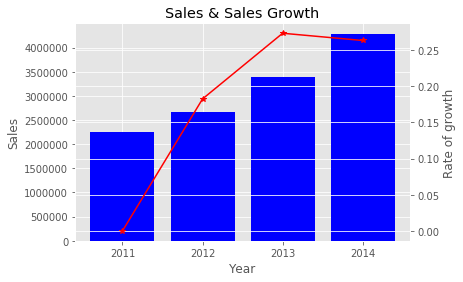

In [41]:
sales_year = df.groupby(by='OrderYear')['Sales'].sum()
print(sales_year)

sales_rate_12 = sales_year[2012] / sales_year[2011] - 1
sales_rate_13 = sales_year[2013] / sales_year[2012] - 1
sales_rate_14 = sales_year[2014] / sales_year[2013] - 1
print(sales_rate_12,sales_rate_13,sales_rate_14)

sales_rate_12_label = "%.2f%%" % (sales_rate_12 * 100)
sales_rate_13_label  = "%.2f%%" % (sales_rate_13 * 100)
sales_rate_14_label  = "%.2f%%" % (sales_rate_14 * 100)
print(sales_rate_12,sales_rate_13,sales_rate_14)

sales_rate = pd.DataFrame({'sales_all':sales_year,'sales_rate':[0,sales_rate_12,sales_rate_13,sales_rate_14], 'sales_rate_label':['0.00%',sales_rate_12_label,sales_rate_13_label,sales_rate_14_label]})
print(sales_rate)

import matplotlib.pyplot as plt
import matplotlib as mpl


plt.style.use('ggplot')
sales_rate = pd.DataFrame({'sales_all':sales_year,'sales_rate':[0,sales_rate_12,sales_rate_13,sales_rate_14]})
y1 = sales_rate['sales_all']
y2 = sales_rate['sales_rate']
x = [str(value) for value in sales_rate.index.tolist()]

fig=plt.figure() 

ax1=fig.add_subplot(1,1,1)

ax2 = ax1.twinx()
ax1.bar(x,y1,color = 'blue')
ax2.plot(x,y2,marker='*',color = 'r')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales')
ax2.set_ylabel('Rate of growth')
ax1.set_title('Sales & Sales Growth')
plt.show()

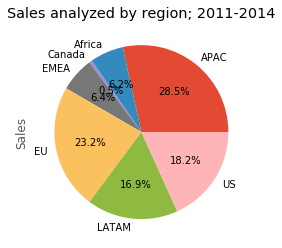

In [43]:
sales_area = df.groupby(by='Market')['Sales'].sum()
sales_area.plot(kind='pie',autopct="%1.1f%%",title='Sales analyzed by region; 2011-2014')

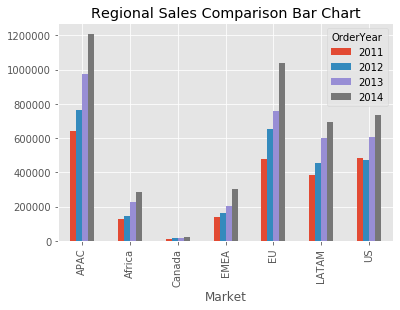

In [45]:
sales_area = df.groupby(by=['Market','OrderYear'])['Sales'].sum()

sales_area = sales_area.reset_index(level=[0,1])

sales_area = pd.pivot_table(sales_area,index='Market',columns='OrderYear',values='Sales')

sales_area.plot(kind = 'bar',title = 'Regional Sales Comparison Bar Chart')

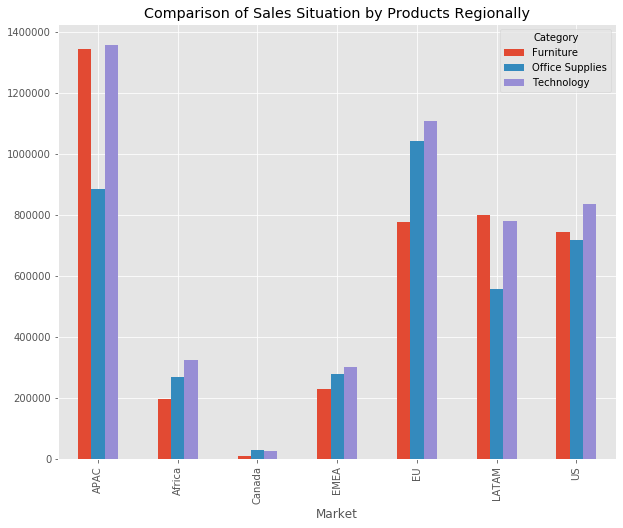

In [47]:
category_sales_area = df.groupby(by=['Market','Category'])['Sales'].sum()
category_sales_area

category_sales_area = category_sales_area.reset_index(level=[0,1])

category_sales_area = pd.pivot_table(category_sales_area,index='Market',columns='Category',values='Sales')

category_sales_area.plot(kind = 'bar',title = 'Comparison of Sales Situation by Products Regionally',figsize= (10,8))

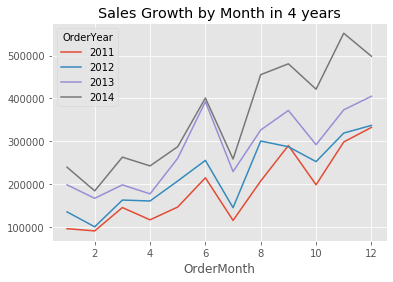

In [51]:
year_month = df.groupby(by=['OrderYear','OrderMonth'])['Sales'].sum()

sales_year_month = year_month.reset_index(level=[0,1])

sales_year_month = pd.pivot_table(sales_year_month,index='OrderMonth',columns='OrderYear',values='Sales')

sales_year_month.plot(title ='Sales Growth by Month in 4 years')

In [54]:
df_cust = df.copy()
df_cust = df.drop_duplicates (subset = ['CustomerID'])
new_customer = df_cust.groupby(by=['OrderYear','OrderMonth']).size()
new_customer = new_customer.reset_index(level=[0,1])
customer_year_month = pd.pivot_table(new_customer,index='OrderMonth',columns='OrderYear',values=0,fill_value=0)
customer_year_month

OrderYear   2011  2012  2013  2014
OrderMonth                        
1            197    25     5     3
2            139    14     6     3
3            173    18     8     0
4            143    16     5     1
5            114    11     4     0
6            151    28     6     6
7             64     9     4     2
8            106    28     7     0
9             85    22     4     0
10            49     6     2     0
11            47    24     1     0
12            41     9     4     0

## RFM (Recency, Frequency, Monetary) Model

(17475, 3)


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

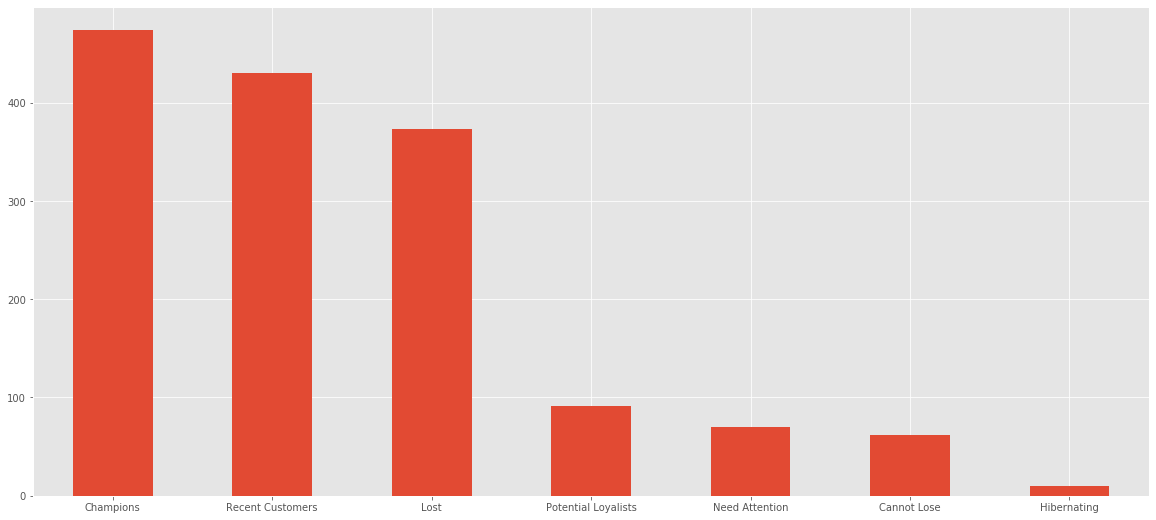

In [62]:
data_14 = df[df.OrderYear == 2014]

data_14 = data_14[['CustomerID','OrderDate','Sales']]
print(data_14.shape)
customdf = data_14.copy() 

customdf.set_index ('CustomerID',drop=True,inplace=True)
customdf['orders'] = 1 

rfmdf = customdf.pivot_table(index=['CustomerID'],values=['OrderDate','orders','Sales'],aggfunc={'OrderDate':'max','orders':'sum','Sales':'sum'})
rfmdf['R'] = (rfmdf.OrderDate.max()-rfmdf.OrderDate).dt.days
rfmdf.rename(columns={'Sales':'M','orders':'F'},inplace=True)
rfmdf

def rfm_func(x):
    level = x.apply(lambda x: "1" if x >= 1 else '0')
    label = level.R + level.F + level.M
    d = {
        '011':'Champions',
        '111':'Cannot Lose',
        '001':'Need Attention',
        '101':'Cannot Lose',
        '010':'Potential Loyalists',
        '110':'Hibernating',
        '000':'Recent Customers',
        '100':'Lost'
    }
    result = d[label]
    return result

rfmdf['label'] = rfmdf[['R','F','M']].apply(lambda x:x-
x.mean()).apply(rfm_func,axis=1)
rfmdf.groupby('label').count()

rfmdf.label.value_counts().plot.bar(figsize=(20,9))
plt.xticks(rotation=0)

In [68]:
custom_grade_df = data_14.copy() 
custom_grade_df 
def order_sort(group):
    return group.sort_values(by='OrderDate')[-1:]

data_14_group = data_14.groupby(by='CustomerID',as_index = False)
data_max_time = data_14_group.apply(order_sort)
print(data_max_time)
data_max_time['F'] = data_14_group.size().values
data_max_time['M'] = data_14_group.sum()['Sales'].values
print(data_max_time)

stat_date = pd.to_datetime('2014-12-31')
r_data = stat_date - data_max_time['OrderDate']
data_max_time['R'] = r_data.values
print(data_max_time)

section_list_F = [0,5,10,15,20,50]
grade_F = pd.cut(data_max_time['F'],bins=section_list_F,labels=[1,2,3,4,5])

data_max_time['F_S'] = grade_F.values


section_list_M = [0,500,1000,5000,10000,30000]
grade_M = pd.cut(data_max_time['M'],bins=section_list_M,labels=[1,2,3,4,5])
data_max_time['M_S'] = grade_M.values

import datetime

section_list_R = [datetime.timedelta(days=i) for i in [-1,32,93,186,277,365]]
grade_R = pd.cut(data_max_time['R'],bins=section_list_R,labels=[5,4,3,2,1])
data_max_time['R_S'] = grade_R.values
data_max_time['F_S'] = data_max_time['F_S'].values.astype('int')
grade_avg = data_max_time['F_S'].values.sum()/data_max_time['F_S'].count()
data_F_S = data_max_time['F_S'].where(data_max_time['F_S']>grade_avg,0)
data_max_time['F_high-low']=data_F_S.where(data_max_time['F_S']<grade_avg,1).values


data_max_time['M_S'] = data_max_time['M_S'].values.astype('int')
grade_avg = data_max_time['M_S'].values.sum()/data_max_time['M_S'].count()
data_M_S = data_max_time['M_S'].where(data_max_time['M_S']>grade_avg,0)
data_max_time['M_high-low']=data_M_S.where(data_max_time['M_S']<grade_avg,1).values
data_max_time['R_S'] = data_max_time['R_S'].values.astype('int')
grade_avg = data_max_time['R_S'].values.sum()/data_max_time['R_S'].count()
data_R_S = data_max_time['R_S'].where(data_max_time['R_S']<grade_avg,0)
data_max_time['R_high-low']=data_R_S.where(data_max_time['R_S']>grade_avg,1).values

data_rfm = data_max_time[['CustomerID','R_high-low','F_high-low','M_high-low']]
def get_sum_value(series):
    return ''.join([str(i) for i in series.values.tolist()[1:]])
              
data_rfm['data_rfm'] = data_rfm.apply(get_sum_value, axis=1)
dic = {
        '011':'Champions',
        '111':'Cannot Lose',
        '001':'Need Attention',
        '101':'Cannot Lose',
        '010':'Potential Loyalists',
        '110':'Hibernating',
        '000':'Recent Customers',
        '100':'Lost'
}
data_rfm['data_rfm'] = data_rfm['data_rfm'].map(dic)
print(data_rfm)

size = data_rfm.groupby(by='data_rfm').size()
size = size.to_frame()
size['rfm_pct'] = ["%.2f%%" % (i/sum(size.values) * 100) for i in size.values]
size

           CustomerID  OrderDate      Sales
0    50439   AA-10315 2014-12-23    45.9900
1    50605   AA-10375 2014-12-25   444.4200
2    43054   AA-10480 2014-08-28    27.8190
3    49133   AA-10645 2014-12-03    43.2957
4    50872     AA-315 2014-12-29    20.0520
...               ...        ...        ...
1505 50393   YS-21880 2014-12-22  1000.0200
1506 39455   ZC-11910 2014-06-14     7.1730
1507 50843   ZC-21910 2014-12-28   237.3300
1508 50838   ZD-11925 2014-12-28     8.7600
1509 51032   ZD-21925 2014-12-30   216.0000

[1510 rows x 3 columns]
           CustomerID  OrderDate      Sales   F          M
0    50439   AA-10315 2014-12-23    45.9900  17  3889.2065
1    50605   AA-10375 2014-12-25   444.4200  14  1904.5380
2    43054   AA-10480 2014-08-28    27.8190  10  7752.9070
3    49133   AA-10645 2014-12-03    43.2957  19  3539.8788
4    50872     AA-315 2014-12-29    20.0520   3   787.3920
...               ...        ...        ...  ..        ...
1505 50393   YS-21880 2014-12-22  

C:\Users\jhjia\anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jhjia\anaconda3\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0 rfm_pct
data_rfm                        
Cannot Lose          368  24.37%
Champions            471  31.19%
Hibernating            5   0.33%
Lost                 402  26.62%
Need Attention       111   7.35%
Potential Loyalists    8   0.53%
Recent Customers     145   9.60%